# Random Forest Regression

Importing important Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading of dataset 

In [2]:
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


making numerical and categorical columns 

In [8]:
numerical_col=['Age','Na_to_K']
categorical_col=['Sex','BP','Cholesterol']

In [9]:
for i in numerical_col:
  print(f"'{i}': {(df[i]==0).sum()}")

'Age': 0
'Na_to_K': 0


In [10]:
for i in categorical_col:
  print(f"'{i}': {df[i].unique()}")

'Sex': ['F' 'M']
'BP': ['HIGH' 'LOW' 'NORMAL']
'Cholesterol': ['HIGH' 'NORMAL']


In [11]:
for i in numerical_col:
    print(f"{i} | Mean:{df[i].mean():.2f} | Median:{df[i].median()} | Mode:{df[i].mode()[0]}")

Age | Mean:44.31 | Median:45.0 | Mode:47
Na_to_K | Mean:16.08 | Median:13.9365 | Mode:12.006


# Data Visualization

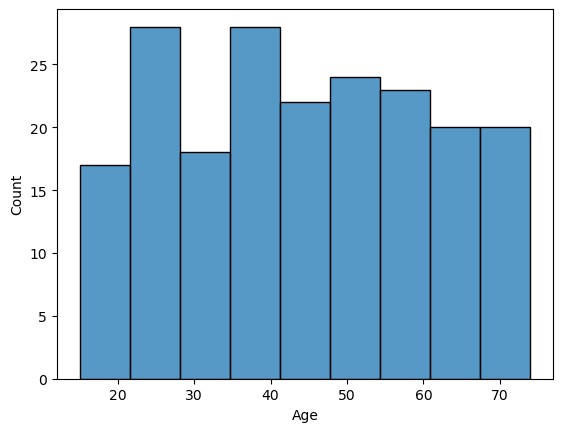

In [12]:
sns.histplot(x='Age',data=df)
plt.show()

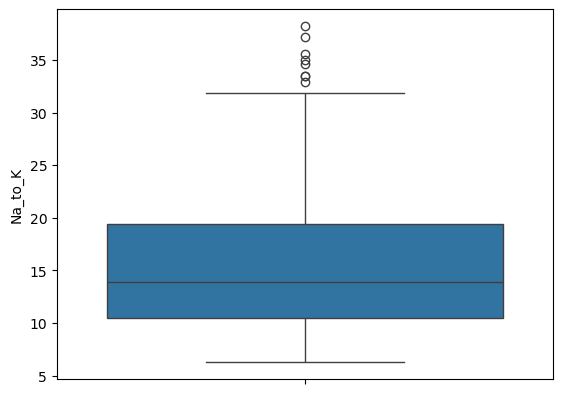

In [13]:

sns.boxplot(y='Na_to_K',data=df)
plt.show()

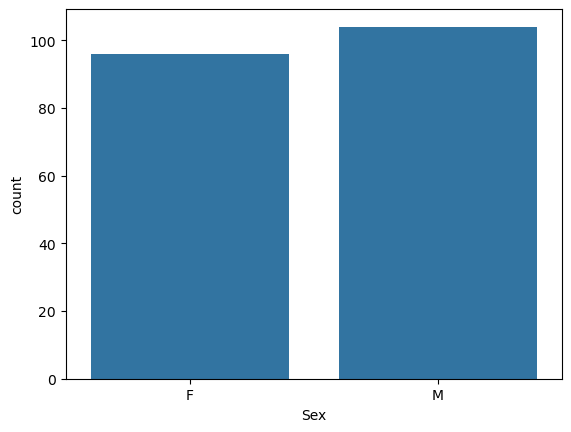

In [14]:
sns.countplot(x='Sex',data=df)
plt.show()

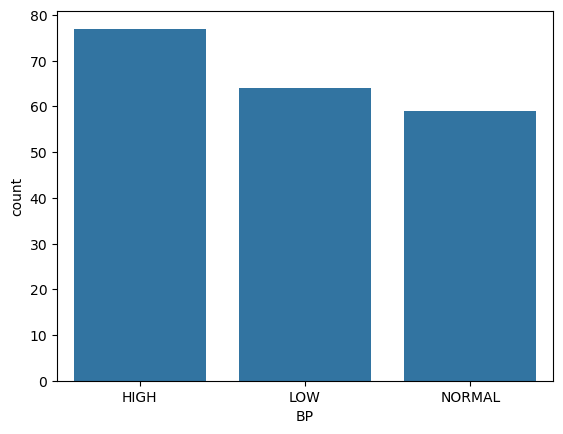

In [15]:
sns.countplot(x='BP',data=df)
plt.show()

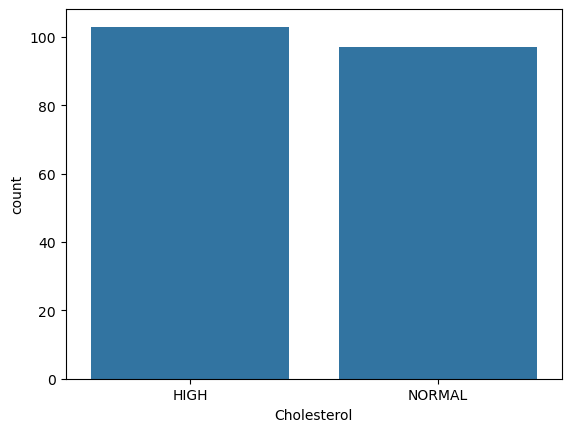

In [16]:
sns.countplot(x='Cholesterol',data=df)
plt.show()

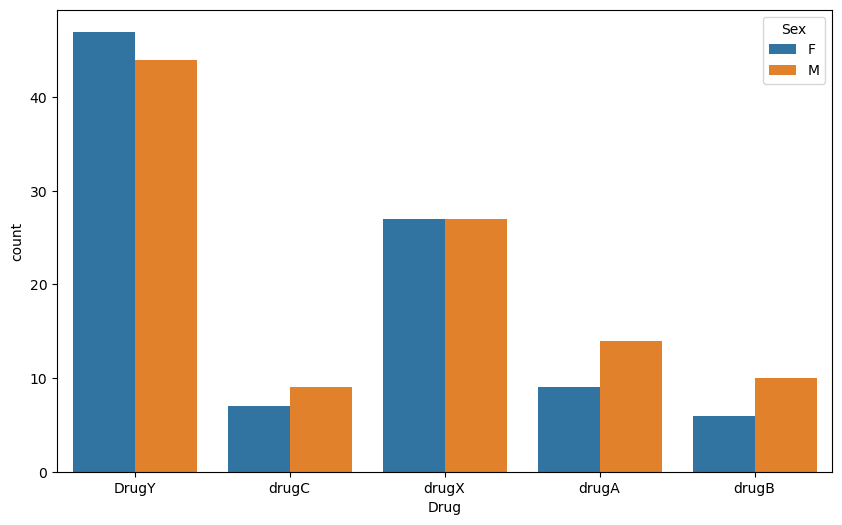

In [17]:
(df[categorical_col] == "unknown").sum()
plt.figure(figsize=(10,6))
sns.countplot(x='Drug',data=df,hue='Sex')
plt.show()

In [18]:
X=df.drop('Drug',axis=1)
y=df['Drug']
X = pd.get_dummies(X, drop_first=True,dtype=int)

In [19]:
X.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


Train test split and choosing Random Forest Classifier 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=60,
    random_state=20,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=4
)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.975
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



Got the accuracy score 97.5% 